<a href="https://colab.research.google.com/github/aedenj/continuous-improvement/blob/main/classes/eep-596-llms/ice-four/Text2Image_LLM_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## About

Jupyter notebook on Text2Image prepared specifically for LLM 2025 class at University of Washington, Seattle.

In this notebook, we go through the following:

a) Set up for diffusion API

b) Use of diffusion API for image generation

c) Playing with different settings for Stable Diffusion

This is part of LLM Lecture series 2025 at University of Washington, Seattle (https://bytesizeml.github.io/llm2025/).

### 1. Setup

In [1]:
! pip install -U transformers
! pip install datasets evaluate -q
! pip install jiwer -q
! pip install -U accelerate
! pip install diffusers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 118.0 MB/s eta 0:00:00
  Attempting uninstall: transformers
    Found existing installation: transformers 4.48.3
    Uninstalling transformers-4.48.3:
      Successfully uninstalled transformers-4.48.3
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.4/485.4 kB 31.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 18.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 82.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 342.1/342.1 kB 25.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━

In [2]:
# 1. Install Libraries
!pip3 install openai
!pip3 install python-dotenv

In [1]:
# 2. Connect to Google Drive
# from google.colab import drive
# drive.mount('/content/drive/', force_remount=True)

# import os
# print(os.system('ls'))

# os.chdir(os.curdir + "/drive/MyDrive/Colab_Notebooks_LLM_2023")

# 3. Open AI API Access Setup
import openai
import os


from dotenv import load_dotenv, find_dotenv
_ = load_dotenv(find_dotenv())



# 4. Open AI text generation APIs
from openai import OpenAI
client = OpenAI(api_key='key')
def get_completion_instruct(prompt, model="gpt-3.5-turbo-instruct"):
    response = client.completions.create(
        model=model,
        prompt=prompt
    )
    #return response.choices[0].text
    return response.choices[0].text

def get_completion(prompt, model="gpt-3.5-turbo"):
  message = {"role": "user", "content": prompt}
  response = client.chat.completions.create(
      model=model,
      messages=[message]
  )
  return response.choices[0].message.content


def get_completion_gpt4o(prompt, model="gpt-4o-mini"):
  message = {"role": "user", "content": prompt}
  response = client.chat.completions.create(
      model=model,
      messages=[message]
  )
  return response.choices[0].message.content

In [4]:
!pwd

/content


In [5]:
!ls

sample_data


## 2. Stability AI demo

In [6]:
## Generates Token and use from hugging face
from huggingface_hub import notebook_login
# PATH = "/content/drive/MyDrive/Colab_Notebooks_LLM_2023/Hugging_Face_Inference/"
# path = PATH + "hf_token.txt"
# with open(path, "r") as f:
#   HF_TOKEN = f.read()

notebook_login()

In [7]:
!pip uninstall diffusers
!pip cache purge
!pip install diffusers==0.27.0
!pip install transformers scipy ftfy
!pip install "ipywidgets>=7,<8"
!wget https://raw.githubusercontent.com/huggingface/diffusers/4674fdf807cdefd4db1758067c0207872d805f8c/examples/inference/image_to_image.py
!pip install wget

Found existing installation: diffusers 0.32.2
Uninstalling diffusers-0.32.2:
  Would remove:
    /usr/local/bin/diffusers-cli
    /usr/local/lib/python3.11/dist-packages/diffusers-0.32.2.dist-info/*
    /usr/local/lib/python3.11/dist-packages/diffusers/*
Proceed (Y/n)? Y
  Successfully uninstalled diffusers-0.32.2
Files removed: 120
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 73.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 65.3 MB/s eta 0:00:00
--2025-02-27 04:58:36--  https://raw.githubusercontent.com/huggingface/diffusers/4674fdf807cdefd4db1758067c0207872d805f8c/examples/inference/image_to_image.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Le

In [2]:
from google.colab import output
from pathlib import Path
from PIL import Image
import torch
!pip install --upgrade huggingface-hub==0.26.2 transformers==4.46.1 tokenizers==0.20.1 diffusers==0.31.0 # This combo is needed to correctly load the StableDiffusionPipeline
from diffusers import StableDiffusionPipeline
import requests
import getpass
from io import BytesIO
#from image_to_image import StableDiffusionImg2ImgPipeline, preprocess
import os, wget

output.enable_custom_widget_manager()
cache_drive = False

### 2a. Text 2 Image Synthesis

In [3]:
# Helping function for plotting images in a 2D grid
from PIL import Image
def image_grid(imgs, rows, cols):
    assert len(imgs) == rows*cols

    w, h = imgs[0].size
    grid = Image.new('RGB', size=(cols*w, rows*h))
    grid_w, grid_h = grid.size

    for i, img in enumerate(imgs):
        grid.paste(img, box=(i%cols*w, i//cols*h))
    return grid

In [4]:
!ls

image_to_image.py  sample_data


## 2b. Load Model

In [5]:
#from huggingface_hub import notebook_login
#notebook_login()

import torch
from diffusers import StableDiffusionPipeline

device = "cuda" #using a gpu
model_id = "CompVis/stable-diffusion-v1-4"

pipe_txt2image = StableDiffusionPipeline.from_pretrained(
    model_id,
    revision="fp16",
    torch_dtype=torch.float16,
).to(device)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/543 [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/diffusers/pipelines/pipeline_loading_utils.py:221: FutureWarning: You are loading the variant fp16 from CompVis/stable-diffusion-v1-4 via `revision='fp16'` even though you can load it via `variant=`fp16`. Loading model variants via `revision='fp16'` is deprecated and will be removed in diffusers v1. Please use `variant='fp16'` instead.
  warnings.warn(


Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

pytorch_model.bin:   0%|          | 0.00/608M [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/246M [00:00<?, ?B/s]

(…)ure_extractor%2Fpreprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

scheduler%2Fscheduler_config.json:   0%|          | 0.00/307 [00:00<?, ?B/s]

(…)oints%2Fscheduler_config-checkpoint.json:   0%|          | 0.00/209 [00:00<?, ?B/s]

safety_checker%2Fconfig.json:   0%|          | 0.00/4.63k [00:00<?, ?B/s]

text_encoder%2Fconfig.json:   0%|          | 0.00/572 [00:00<?, ?B/s]

tokenizer%2Fmerges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/1.72G [00:00<?, ?B/s]

tokenizer%2Fvocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

vae%2Fconfig.json:   0%|          | 0.00/550 [00:00<?, ?B/s]

tokenizer%2Fspecial_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

unet%2Fconfig.json:   0%|          | 0.00/772 [00:00<?, ?B/s]

tokenizer%2Ftokenizer_config.json:   0%|          | 0.00/788 [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/167M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

An error occurred while trying to fetch /root/.cache/huggingface/hub/models--CompVis--stable-diffusion-v1-4/snapshots/2880f2ca379f41b0226444936bb7a6766a227587/unet: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--CompVis--stable-diffusion-v1-4/snapshots/2880f2ca379f41b0226444936bb7a6766a227587/unet.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.
An error occurred while trying to fetch /root/.cache/huggingface/hub/models--CompVis--stable-diffusion-v1-4/snapshots/2880f2ca379f41b0226444936bb7a6766a227587/vae: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--CompVis--stable-diffusion-v1-4/snapshots/2880f2ca379f41b0226444936bb7a6766a227587/vae.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.
/usr/local/lib/python3.11/dist-packages/transformers/models/clip/feature_extraction_clip.py:28

## 2c. Model *Inference*

  0%|          | 0/150 [00:00<?, ?it/s]

length of images =  4


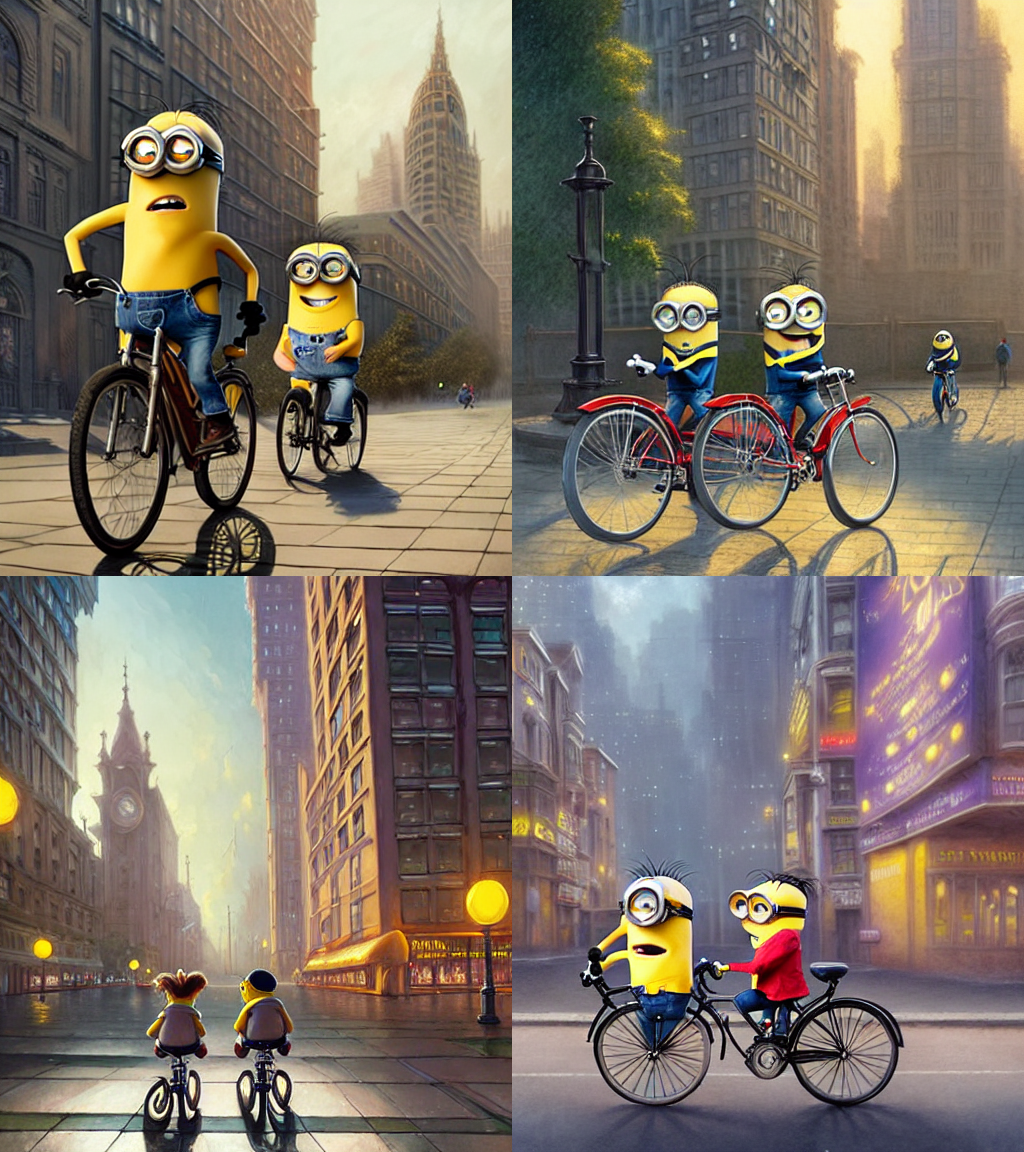

In [34]:
#@title ### 2c. Stable Diffusion txt2img
prompt = "Two minions riding a bicycle in the city, with the Guru, tone mapped, shiny, intricate, cinematic lighting, highly detailed, digital painting, artstation, concept art, smooth, sharp focus, illustration, art by terry moore and greg rutkowski" #@param {type:"string"}

#@markdown Height of the Image:
H = 576 #@param {type:"slider", min:256, max:1024, step:64}

#@markdown Width of the Image:
W = 512 #@param {type:"slider", min:256, max:1024, step:64}

#@markdown Number of images to generate:
n = 4 #@param {type:"integer"}

#@markdown Seed:
seed = 3 #@param {type:"integer"}

#@markdown Steps to generate the image(lower number->faster but crappier image):
steps = 150 #@param {type:"slider", min:1, max:150, step:1}

#@markdown How strong your text prompt should influence the image(default 7.5)
guidance_scale = 15 #@param {type:"slider", min:6, max:15, step:0.1}

#@markdown ### Display Settings
show_grid = True #@param {type:"boolean"}
#@markdown If you have `show_grid` enabled, make sure `n = rows*columns`
#@markdown , Ignore if you have `show_grid` disabled.

prompt = [prompt] * n
generator = torch.Generator("cuda").manual_seed(seed)
with torch.autocast("cuda"):
    images = pipe_txt2image(prompt, num_inference_steps=steps, height=H, width=W, guidance_scale=guidance_scale)["images"]
    print("length of images = ", len(images))
    del generator

if show_grid:
    rows = 2 #@param {type:"integer"}
    columns = 2 #@param {type:"integer"}

    grid = image_grid(images, rows=rows, cols=columns)
    display(grid)

In [35]:
images[3].save('background_image.png')

In [36]:
!ls

background_image.png  image_to_image.py  sample_data


## ICE 1

Play around with the image data set above and:

a) Test the image generation for a really small steps vs large steps - What difference do you notice?
b) Test the image generation with a high guidance scale vs a low guidane scale - What do you notice?

### Q: Test the image generation for a really small steps vs large steps - What difference do you notice?

**A:** I made the following observations,

* Given the initial parameters, increasing the number of images resulted in worse images.

* Given the initial parameters, inceasing both steps and guidance both results in better overall images.


* Given the initial parameters, inceasing both steps and guidance both results in better overall images while also increasing the number of images results in fewer quality candidates than the initial value of 4.

* Given the initial parameters, inceasing the height and/or width in any significant way results in less accurate images by including more than two minions.

* I aslo tried various seed values, like: 7, 13, 50102 and they all gave me less accurate images.

* Given the initial parameters, I inceased the height and width  significantly and in addition set guidance to the max and steps to the max. This resulted in better images than with less steps and guidanced, but still not as good as the original parametes.

Overall, my impression is that the model is very sensative to the combination of parameters and one will need to explore these settings to properly generate desired images.



### Q. Test the image generation with a high guidance scale vs a low guidane scale - What do you notice?

**A:** Given the initial parameters, as one generates images with increaing values of guidance the more accurate the image is with respect to the provided text.

## ICE 2

Imagine now that you want to use the starter image as a background and generate an image corrposnding to each caption with the background as a starter iamge.

For example: For the 4th image above - Generate minions with the background of the ocean and mountains.

How would your use of Stability APIs change? What would be a creative prompt that can get the job done here?

In [37]:
bg_image = Image.open("background_image.png").convert("RGB").resize((512, 512))


In [38]:
from diffusers import StableDiffusionImg2ImgPipeline

device = "cuda" #using a gpu
model_id = "CompVis/stable-diffusion-v1-4"

pipe_img2img = StableDiffusionImg2ImgPipeline.from_pretrained(
    model_id,
    revision="fp16",
    torch_dtype=torch.float16
).to(device)

/usr/local/lib/python3.11/dist-packages/diffusers/pipelines/pipeline_loading_utils.py:221: FutureWarning: You are loading the variant fp16 from CompVis/stable-diffusion-v1-4 via `revision='fp16'` even though you can load it via `variant=`fp16`. Loading model variants via `revision='fp16'` is deprecated and will be removed in diffusers v1. Please use `variant='fp16'` instead.
  warnings.warn(


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

An error occurred while trying to fetch /root/.cache/huggingface/hub/models--CompVis--stable-diffusion-v1-4/snapshots/2880f2ca379f41b0226444936bb7a6766a227587/unet: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--CompVis--stable-diffusion-v1-4/snapshots/2880f2ca379f41b0226444936bb7a6766a227587/unet.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.
An error occurred while trying to fetch /root/.cache/huggingface/hub/models--CompVis--stable-diffusion-v1-4/snapshots/2880f2ca379f41b0226444936bb7a6766a227587/vae: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--CompVis--stable-diffusion-v1-4/snapshots/2880f2ca379f41b0226444936bb7a6766a227587/vae.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.
/usr/local/lib/python3.11/dist-packages/transformers/models/clip/feature_extraction_clip.py:28

  0%|          | 0/80 [00:00<?, ?it/s]

length of images =  4


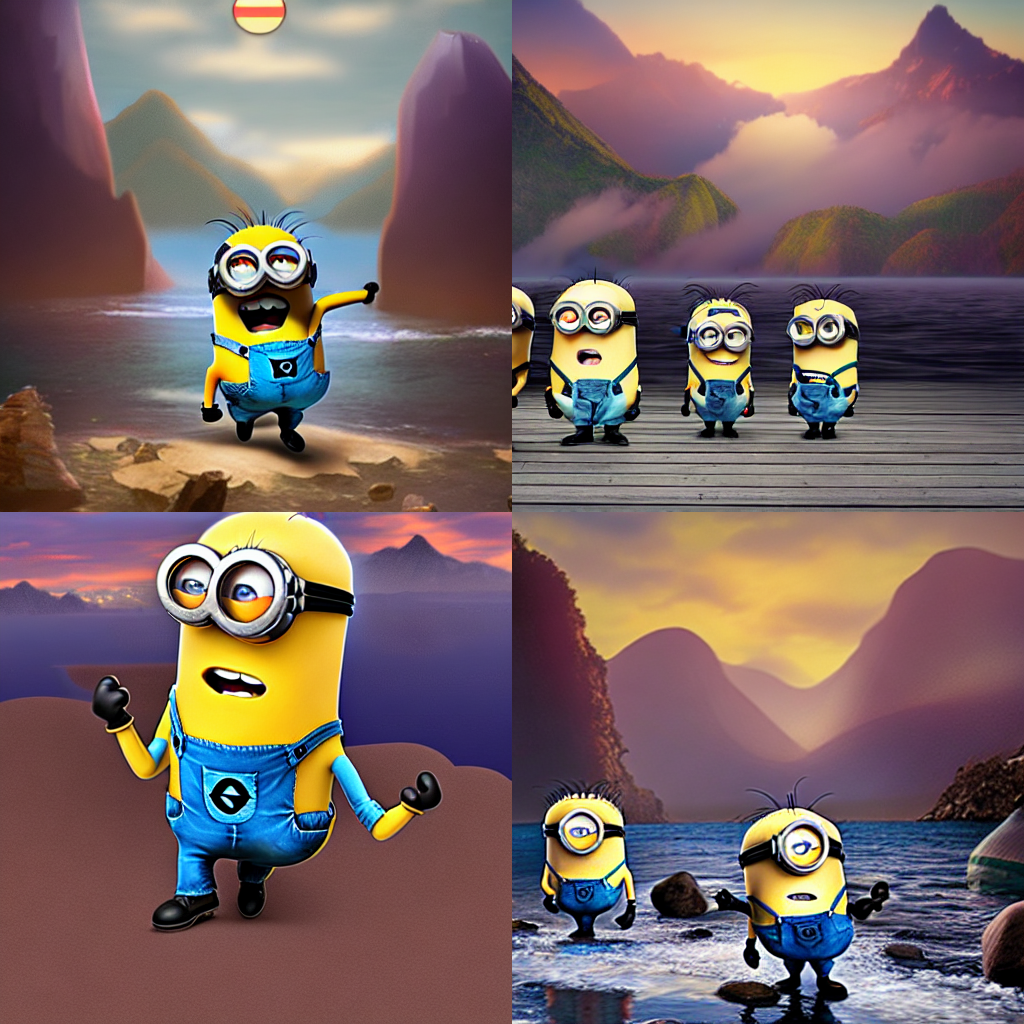

In [32]:
#@title ### 2c. Stable Diffusion img2img
prompt = "Generate minions with the background of the ocean and mountains" #@param {type:"string"}

#@markdown Height of the Image:
H = 576 #@param {type:"slider", min:256, max:1024, step:64}

#@markdown Width of the Image:
W = 512 #@param {type:"slider", min:256, max:1024, step:64}

#@markdown Number of images to generate:
n = 4 #@param {type:"integer"}

#@markdown Seed:
seed = 50102 #@param {type:"integer"}

#@markdown Steps to generate the image(lower number->faster but crappier image):
steps = 100 #@param {type:"slider", min:1, max:150, step:1}

#@markdown How strong your text prompt should influence the image(default 7.5)
guidance_scale = 15 #@param {type:"slider", min:6, max:15, step:0.1}

#@markdown ### Display Settings
show_grid = True #@param {type:"boolean"}
#@markdown If you have `show_grid` enabled, make sure `n = rows*columns`
#@markdown , Ignore if you have `show_grid` disabled.

prompt = [prompt] * n
generator = torch.Generator("cuda").manual_seed(seed)
with torch.autocast("cuda"):
  c_images = pipe_img2img(
      prompt=prompt,
      image=bg_image,
      num_inference_steps=steps,
      height=H,
      width=W,
      guidance_scale=guidance_scale).images
  print("length of images = ", len(c_images))
del generator

if show_grid:
    rows = 2 #@param {type:"integer"}
    columns = 2 #@param {type:"integer"}

    grid = image_grid(c_images, rows=rows, cols=columns)
    display(grid)